### Adaline

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Adaline_Training.csv')
df

,x1,x2,target
0,1,1,-1
1,1,-1,1
2,-1,1,-1
3,-1,-1,-1


In [3]:
Y = df.target
X = df.drop(columns = 'target')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      4 non-null      int64
 1   x2      4 non-null      int64
 2   target  4 non-null      int64
dtypes: int64(3)
memory usage: 228.0 bytes


In [5]:
df.shape

(4, 3)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      4 non-null      int64
 1   x2      4 non-null      int64
 2   target  4 non-null      int64
dtypes: int64(3)
memory usage: 228.0 bytes


In [6]:
df.describe()

,x1,x2,target
count,4.000000,4.000000,4.0
mean,0.000000,0.000000,-0.5
std,1.154701,1.154701,1.0
min,-1.000000,-1.000000,-1.0
25%,-1.000000,-1.000000,-1.0
50%,0.000000,0.000000,-1.0
75%,1.000000,1.000000,-0.5
max,1.000000,1.000000,1.0


<Axes: >

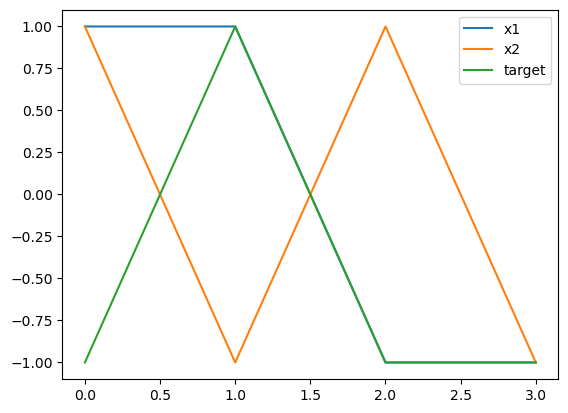

In [7]:
df.plot()

In [8]:
class Adaline():
    def __init__(self,param: list,threshold: float):
        self.param = param
        self.threshold_value = threshold

    def fit(self, X: pd.DataFrame, Y: pd.DataFrame, l_r: float):
        self.X = X
        X.insert(0,'1',1)
        self.Y = Y
        error = 0
        while(True):
            I_j_arr = []
            for j in range(len(X)):
                I_j = np.dot(self.param,X.iloc[j])
                I_j_arr.append(I_j)
                if (Y.iloc[j] - I_j)!=0:
                    for k in range(len(self.param)):
                        self.param[k] = self.param[k] + l_r * (Y.iloc[j]-I_j) *  X.iloc[j][k]
            prev_error = error
            error = self.SSE(I_j_arr)
            #If the previous error = current error terminate
            #Checking with threshold to end the loop 
            print('error: ',error)
            if self.threshold(error) or prev_error == error:
                break
                
    def threshold(self, error: float)->bool:
        return True if error <= self.threshold_value else False

    def SSE(self,I_j: list)-> float:
        return np.sum(np.square(I_j - self.Y))

    def get_param(self):
        return self.param

In [9]:
model = Adaline(param=[0.2,0.2,0.2],threshold=0.5)
model.fit(X,Y,l_r=0.2)

error:  5.7156198400000005
error:  2.430205401654886
error:  2.085743908795756
error:  2.0440656945108513
error:  2.0395546354292136
error:  2.039821192526251
error:  2.040338477062453
error:  2.040621593691771
error:  2.040743721091613
error:  2.040790820171745
error:  2.0408077614612985
error:  2.040813555759904
error:  2.040815459377969
error:  2.040816063470146
error:  2.0408162491677073
error:  2.0408163045116385
error:  2.040816320489172
error:  2.040816324944408
error:  2.040816326137493
error:  2.040816326441129
error:  2.0408163265131005
error:  2.040816326528301
error:  2.0408163265308135
error:  2.0408163265309347
error:  2.040816326530783
error:  2.0408163265306833
error:  2.0408163265306385
error:  2.0408163265306216
error:  2.0408163265306145
error:  2.0408163265306136
error:  2.0408163265306136


In [10]:
model.get_param()

[-0.4999999999999999, 0.5714285714285714, -0.3571428571428571]